In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!ls '/content/drive/My Drive/CNN/'

dataset				    Vehicle_Data_Image_Classification.ipynb
dataset_Image_Classification.ipynb  Vehicle_Data_Saved_model.ipynb
dataset_Load_Saved_model.ipynb	    Vehicle_Trained_Model_S128E25.h5
dataset_S256E20.h5		    Vehicle_Trained_Model_S256E15.h5
my_model.h5			    Vehicle_Trained_Model_S256E25.h5
Sports_Celebrity_Data		    Vehicle_Trained_Model_S64E20.h5
Vehicle_Data


In [22]:
dataset_path = '/content/drive/My Drive/CNN/Vehicle_Data/'

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [24]:
# lists to hold data

images = []
labels = []

In [25]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['bus',
 'cycle',
 'bike',
 'plane',
 'scooty',
 'helicopter',
 'car',
 'truck',
 'boat']

In [26]:
# Creating dictionaries to map folder names

name_mapping_dict = {'bus': 0,
                     'cycle': 1,
                     'bike': 2,
                     'plane': 3,
                     'scooty': 4,
                     'helicopter': 5,
                     'car': 6,
                     'truck': 7,
                     'boat':8
                     }


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'bus', 1: 'cycle', 2: 'bike', 3: 'plane', 4: 'scooty', 5: 'helicopter', 6: 'car', 7: 'truck', 8: 'boat'}


In [27]:
# Setting image size
img_size = 128
# image_size = 128

In [28]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname) 
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: bus
Processing folder: cycle
Processing folder: bike
Processing folder: plane
Processing folder: scooty
Processing folder: helicopter
Processing folder: car
Processing folder: truck
Processing folder: boat


In [29]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [30]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (468, 128, 128, 3)
labels shape :  (468,)


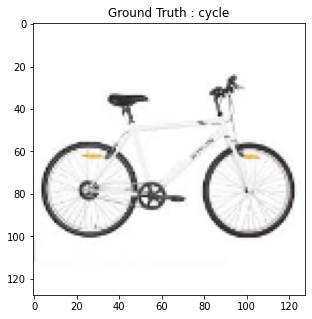

In [31]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

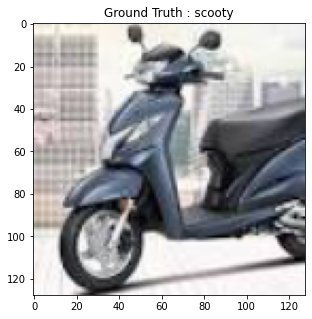

In [32]:
# Plotting samples from data to check if data has been read successfully
img_number = 207
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

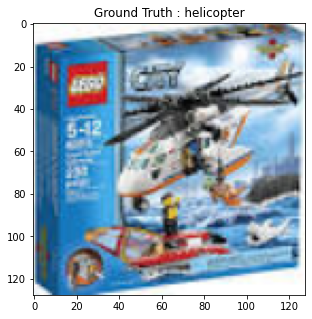

In [33]:
# Plotting samples from data to check if data has been read successfully
img_number = 306
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

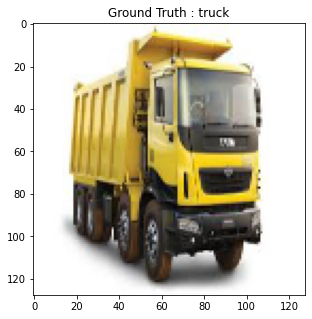

In [34]:
# Plotting samples from data to check if data has been read successfully
img_number = 406
plt.figure(figsize=[10,5])
#plt.imshow(images[img_number,:,:])
plt.imshow(images[img_number,:,:].astype('uint8'))
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [35]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  9
Output classes :  [0 1 2 3 4 5 6 7 8]


In [36]:
# Normalize training image pixels
images = np.array(images) / 255

In [37]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [38]:
labels[303]

5

In [39]:
labels_one_hot[303]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [40]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (421, 128, 128, 3) (421, 9)
Testing data shape :  (47, 128, 128, 3) (47, 9)


In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 2.3533 - accuracy: 0.1235 - val_loss: 2.1797 - val_accuracy: 0.0638
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 2.1667 - accuracy: 0.2043 - val_loss: 2.1642 - val_accuracy: 0.1702
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 2.1251 - accuracy: 0.2898 - val_loss: 2.1196 - val_accuracy: 0.2340
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 2.0370 - accuracy: 0.3040 - val_loss: 2.0329 - val_accuracy: 0.1702
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 1.9068 - accuracy: 0.3444 - val_loss: 1.9478 - val_accuracy: 0.2340
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 1.7439 - accuracy: 0.3753 - val_loss: 1.9922 - val_accuracy: 0.2128
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 1.5927 - accuracy: 0.4727 - val_loss: 1.6516 - val_accuracy: 0.4255
Epoch 8/20
4/4 [=========================

In [44]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc*100))

2/2 [==============================] - 0s 66ms/step - loss: 1.9456 - accuracy: 0.5106
Evaluation result on Test Data : Loss = 1.9455897808074951, accuracy = 51.06382966041565
14/14 [==============================] - 2s 123ms/step - loss: 0.1274 - accuracy: 0.9691
Evaluation result on Train Data : Loss = 0.1273878663778305, accuracy = 96.91211581230164


In [46]:
model_path = '/content/drive/My Drive/CNN/'

model.save(model_path+'Vehicle_Trained_Model_S128E20.h5')

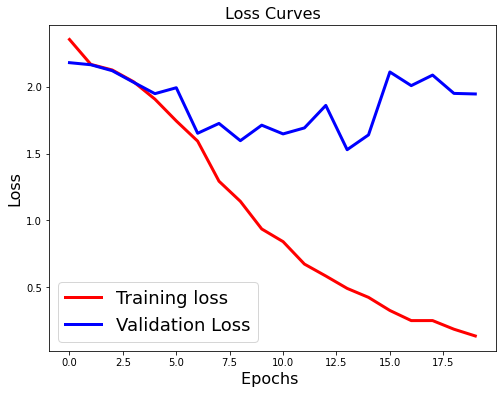

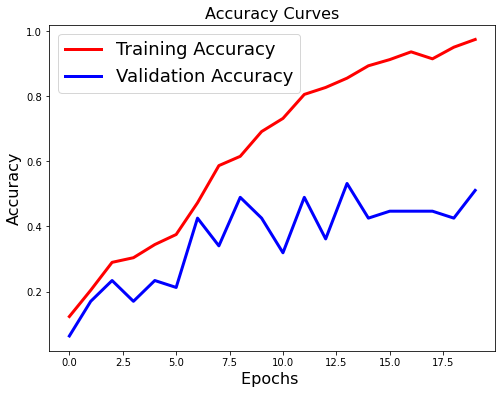

In [47]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

Model prediction: car


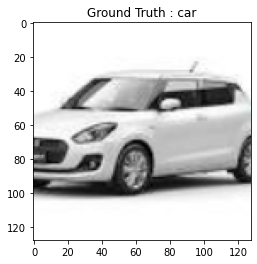

In [48]:
# Predict the most likely class
test_img_number = 11

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: car


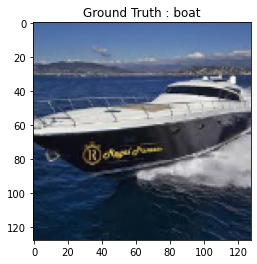

In [49]:
# Predict the most likely class
test_img_number = 20

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: boat


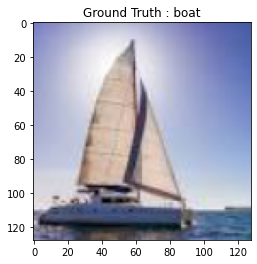

In [50]:
# Predict the most likely class
test_img_number = 15

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: plane


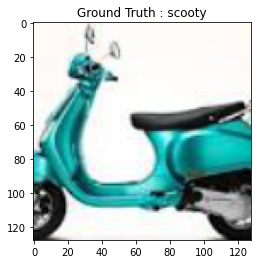

In [51]:
# Predict the most likely class
test_img_number = 21

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: car


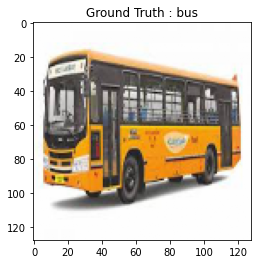

In [52]:
# Predict the most likely class
test_img_number = 34

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: truck


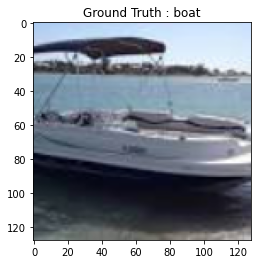

In [53]:
# Predict the most likely class
test_img_number = 40

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: bike


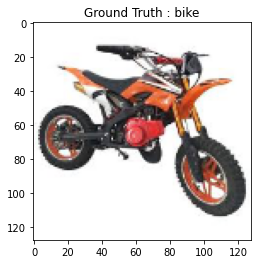

In [56]:
# Predict the most likely class
test_img_number = 31

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: helicopter


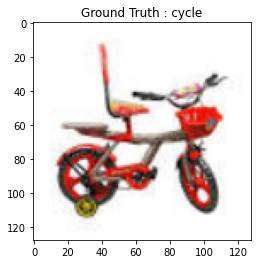

In [58]:
# Predict the most likely class
test_img_number = 3

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: scooty


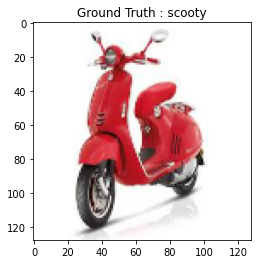

In [59]:
# Predict the most likely class
test_img_number = 30

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: truck


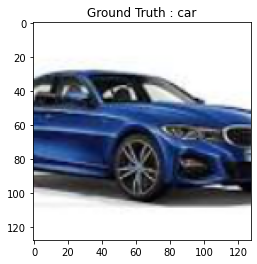

In [60]:
# Predict the most likely class
test_img_number = 33

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: scooty


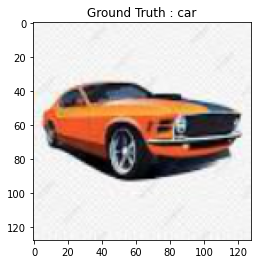

In [61]:
# Predict the most likely class
test_img_number = 13

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: bus


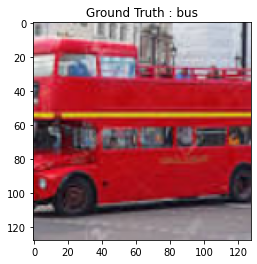

In [62]:
# Predict the most likely class
test_img_number = 29

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: truck


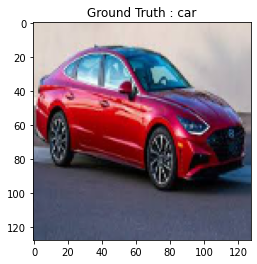

In [63]:
# Predict the most likely class
test_img_number = 39

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()